# Part II -  Analysis of Prosper Loan Data
## by Oluwaseyi Ogundimu

## Investigation Overview

This investigation studies the credit score criteria a borrower type(income verified and unverified) has to meet in a rating before getting a loan; and the influence of borrower credit ratings on how Prosper lends, profits, assigns estimated losses and makes actual losses.

Prosper was founded in 2005 as a peer-to-peer online lending marketplace in the United States. Borrowers apply online for a fixed-rate, fixed-term loan and investors (individual or institutional) can fund anywhere from $\$$2,000 to $\$$40,000 per loan request to earn returns.


## Dataset Overview

The initial dataset contained 113,937 loans on Proper's marketplace with 81 variables on each loan. The resulting dataset after cleaning contains 26 features about 112,238 loans from 2005 to 2014, with the crucial ones listed below:

* `borrowerapr`: The Borrower's Annual Percentage Rate (APR) for the loan. It refers to the total cost of borrowing for a year. Importantly, it includes the standard fees and interest to be paid.  

* `estimatedloss`: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

* `creditscorerangelower`: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

* `incomeverifiable`: The borrower indicated they have the required documentation to support their income.

* `loanoriginalamount`: The origination amount of the loan.

* `loanoriginationquarter`: The quarter in which the loan was originated.

* `lp_netprincipalloss`: The principal that remains uncollected after any recoveries.

* `credit_rating`: A combination of credit grade(a rating score used before 2009) and prosper score-alpha( rating score used after 2009.)

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
sb.set_style('darkgrid')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('loan_cleaned.csv')

In [5]:
# ordering credit rating variable
orders = {'credit_rating' : ['NC', 'HR', 'E', 'D',  'C',  'B', 'A', 'AA']}

for cat in orders:
    order = pd.api.types.CategoricalDtype(ordered = True, categories = orders[cat])
    loan[cat] = loan[cat].astype(order)

# <center>Borrower Patterns in Credit Ratings</center>

## Customer Groups

Prosper has two user groups;  the "Verified" who are borrowers who had and submitted required documentation to corroborate their current income, and  the "Unverified" who did not. During the investigation period, 92.4% of users were verified, while 7.6% were not.

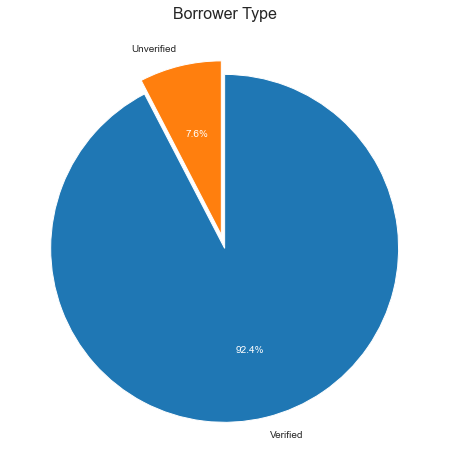

In [6]:
# Percentage of verified and unverified customers
rcParams['figure.figsize'] = 10, 8

# plotting pie chart
_, _, autotexts = plt.pie(loan.incomeverifiable.value_counts(), labels = ['Verified', 'Unverified'], 
                          startangle = 90, counterclock = False, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')

# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
    
# title and labels
plt.title('Borrower Type', fontsize=16, y=1.015)
plt.rcParams['font.size'] = 14
plt.show();

## Customer Credit Ratings

The highest proportion of borrowers had average credit ratings with lower proportion at the extremes. Prosper rarely facilitated loans to borrowers in the NC rating.

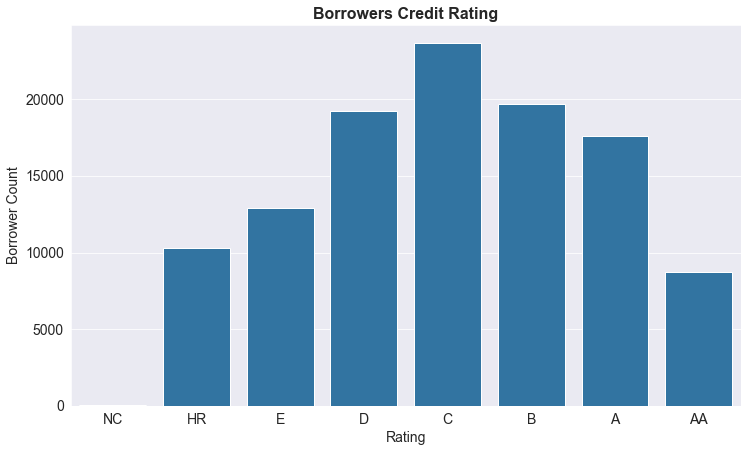

In [7]:
# plotting bar for 'credit_rating' column
base = sb.color_palette()[0]
plt.figure(figsize = [12, 7])
sb.countplot(x = loan.credit_rating, color = base)

# title and labels
plt.title("Borrowers Credit Rating", fontweight = 'bold', fontsize = 16)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Borrower Count', fontsize = 14)
plt.show;

## Credit Score Trends in Credit Ratings

As expected, the mean credit score increased with higher credit ratings. 

It was observed that those who didn't have their source of income verified(in a credit_rating) had to have higher credit score when compared to verified people in the same credit rating.

Also, the difference between the mean credit scores of the unverified and verified reduced with increasing credit ratings, with a wider margin at HR to AA almost having no difference .


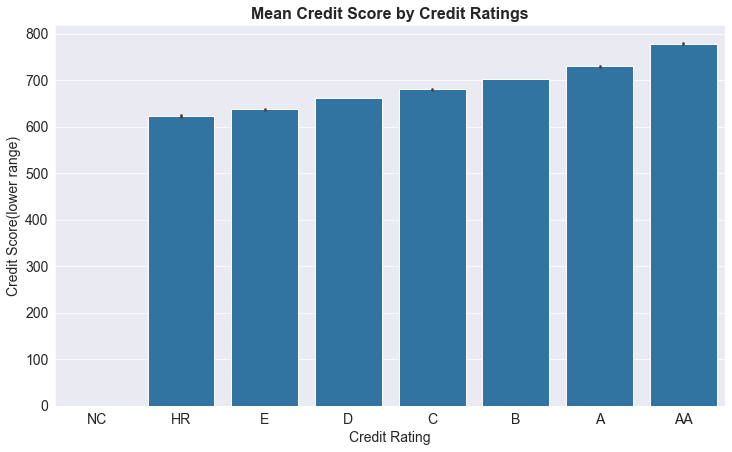

In [8]:
# clustered barplot for mean credit score by credit rating for each borrower type
plt.figure(figsize = [12, 7])
sb.barplot(data = loan, x = 'credit_rating', y = 'creditscorerangelower', color = base)

# title and labels
plt.title('Mean Credit Score by Credit Ratings', fontweight = 'bold', fontsize = 16)
plt.xlabel('Credit Rating', fontsize = 14)
plt.ylabel('Credit Score(lower range)', fontsize = 14);

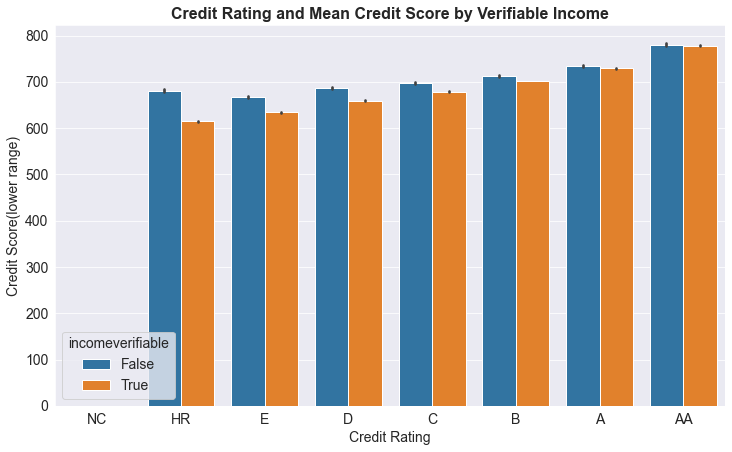

In [9]:
# clustered barplot for mean credit score by credit rating for each borrower type
plt.figure(figsize = [12, 7])
sb.barplot(data = loan, x = 'credit_rating', y = 'creditscorerangelower', hue = 'incomeverifiable')

# title and labels
plt.title('Credit Rating and Mean Credit Score by Verifiable Income', fontweight = 'bold', fontsize = 16)
plt.xlabel('Credit Rating', fontsize = 14)
plt.ylabel('Credit Score(lower range)', fontsize = 14);

# <center>Influence of Credit Ratings on Prosper Rates and Finances</center>

## Distribution of Borrower Annual Percentage Rate

Borrower annual percentage rate in the dataset ranged from about 0.06(6%) to 0.42(42%) of the amount borrowed. The distibution which has a rough shape, seems almost normal on a linear scale with a deviation at 36%, the peak.

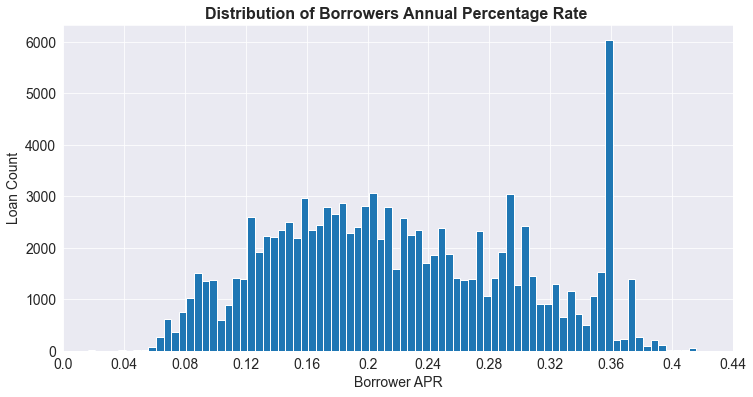

In [10]:
# plotting histogram for the 'borrowerapr' column
plt.figure(figsize = [12, 6])
bins = np.arange(0.006, 0.512290 + 0.03, 0.005)
ticks = np.arange(0, 0.45, 0.04)
plt.hist(x = loan.borrowerapr, bins = bins)
plt.xlim(0.04, 0.44)
plt.xticks(ticks, ticks)

# title and labels
plt.title("Distribution of Borrowers Annual Percentage Rate ", fontweight = 'bold', fontsize = 16)
plt.xlabel('Borrower APR', fontsize = 14)
plt.ylabel('Loan Count', fontsize = 14)
plt.show;

## Distribution of Estimated Loss

The loss prosper expected on individual loans was spread between 0.4% and 37% approximately in the dataset. The distribution, when plotted on a logarithmic scale, takes on a multimodal shape with a major node at about 10%.

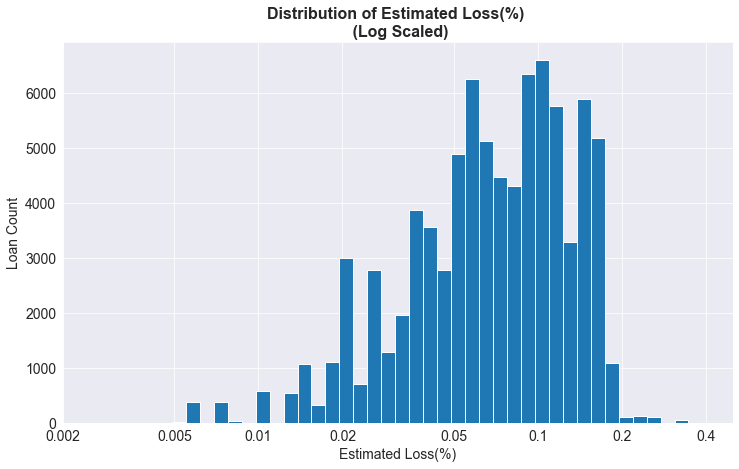

In [11]:
# plotting log scaled histogram for 'estimatedloss' column
plt.figure(figsize = [12, 7])
bins = 10 ** np.arange(-2.309804,  -0.43 , 0.05)
ticks = [0.002, 0.005, 0.010, 0.020, 0.050, 0.10, 0.2, 0.4]
plt.hist(x = loan.estimatedloss, bins = bins)
plt.xscale('log')
plt.xlim(0.002, 0.5)
plt.xticks(ticks, ticks);

# title and labels
plt.title("Distribution of Estimated Loss(%) \n (Log Scaled)", fontweight = 'bold', fontsize = 16)
plt.xlabel('Estimated Loss(%)', fontsize = 14)
plt.ylabel('Loan Count', fontsize = 14)
plt.show;

## Influence of Credit Rating on Loan Amount

Credit ratings played a huge role in the amount customers were able to borrow on prosper. The upper limit of loan amount was capped at $\$$15k for high risk and NC rated borrowers, $\$$25k for those rated in between 'E' up to 'C', and $\$$35k for those in the ratings 'B' upwards to 'AA'.

The APR attached to loans also seemed to be higher when borrower credit rating was low. There were irregularities though, with some loans taken by borrowers rated 'AA' having high APRs. This set of borrowers most likely had past delinquencies with loans taken.

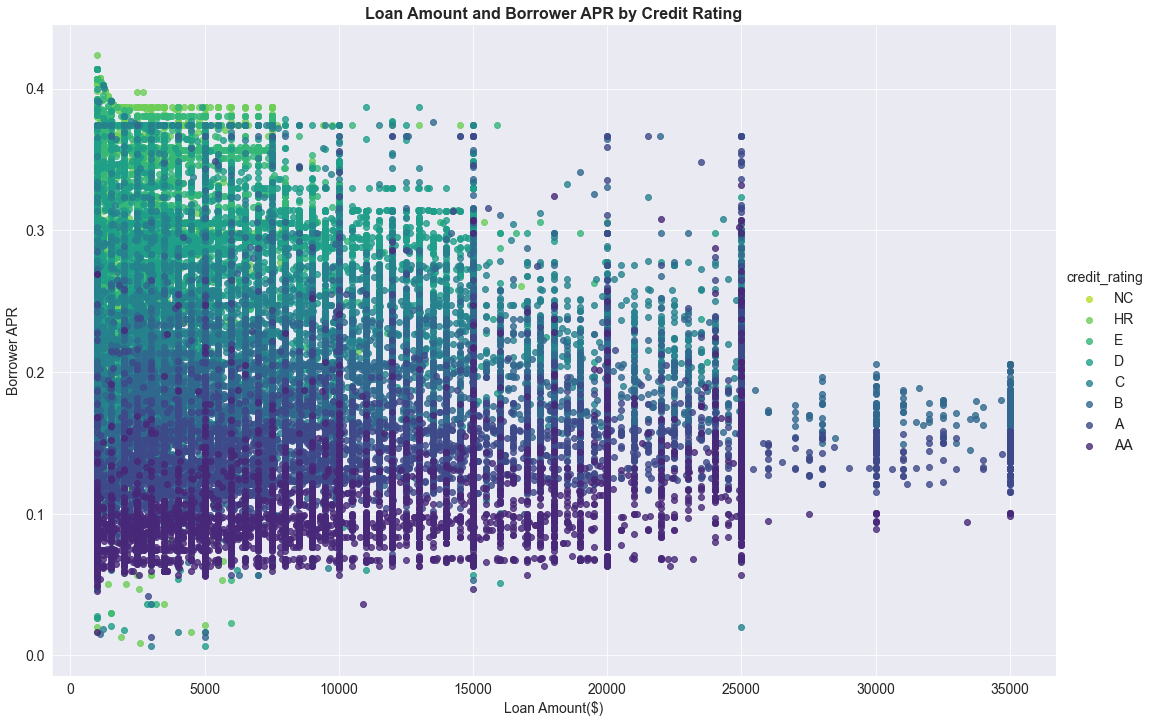

In [12]:
# plotting scatterplot for loan amount and borrower APR features
g = sb.FacetGrid(data = loan, hue = 'credit_rating', size = 10,  aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'loanoriginalamount', 'borrowerapr', fit_reg = False, x_jitter = 0.04)

# title and labels
g.add_legend()
plt.title('Loan Amount and Borrower APR by Credit Rating', fontweight = 'bold', fontsize = 16)
plt.xlabel('Loan Amount($)', fontsize = 14)
plt.ylabel('Borrower APR', fontsize = 14);

## Influence of Credit Rating on Prosper's Estimated Loss and Profit

There is a strong positive linear correlation between borrowers annual percentage rate and estimated loss. An increase in the rate at which prosper profits(through interest rate - APR) from a loan means an increase in the amount that could be lost from that loan. 

These features are negatively associated with credit rating in that higher APR and estimated loss are assigned to loans taken by borrowers with low credit rating and vice versa. Borrowers who had higher APR or estimated loss most likely had delinquencies with past loans which affected their standings.

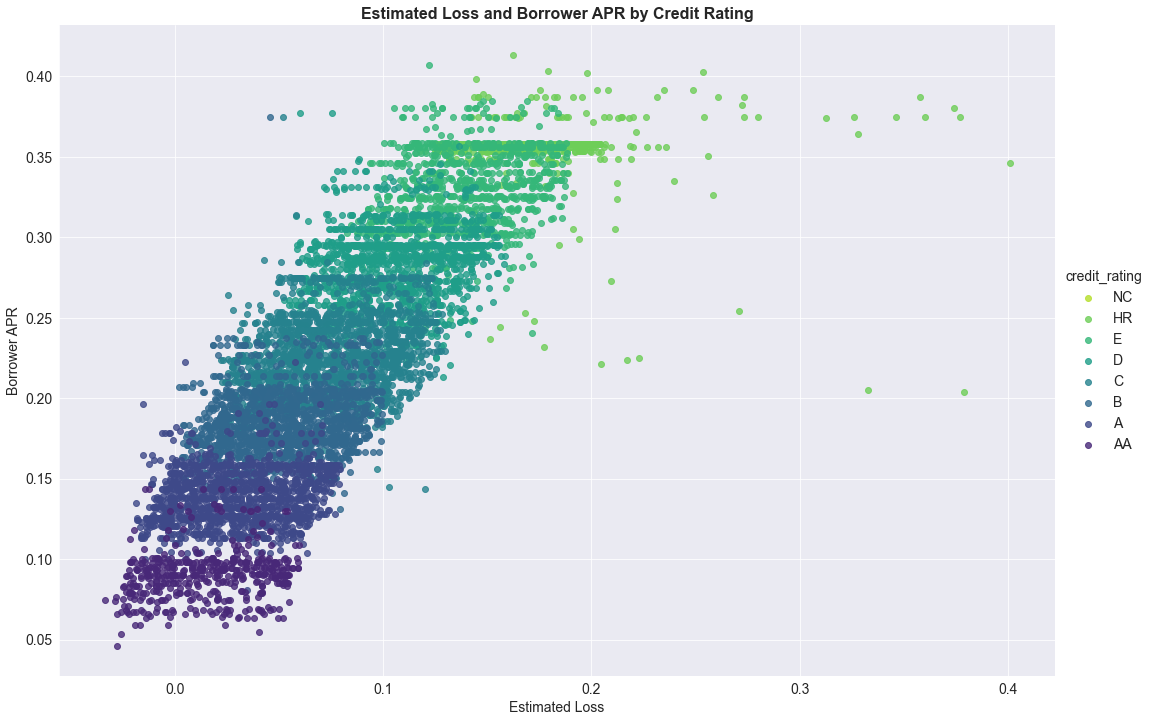

In [13]:
# getting a sample size for plotting
sample = loan.sample(n = 10000)

# plotting scatterplot for estimated loss and borrower apr
g = sb.FacetGrid(data = sample, hue = 'credit_rating', size = 10,  aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'estimatedloss', 'borrowerapr', fit_reg = False, x_jitter = 0.04)

# title and labels
g.add_legend()
plt.title('Estimated Loss and Borrower APR by Credit Rating', fontweight = 'bold', fontsize = 16)
plt.xlabel('Estimated Loss', fontsize = 14)
plt.ylabel('Borrower APR', fontsize = 14);

## Relationship between Estimated Loss and Actual Loss by Credit Rating

Although a big proportion of loans did not result in losses(characterised by net loss being 0), for those which did;there seemed to be a negative correlation between losses made and estimated loss. 

Interesting to note is that people with high credit rating and low expected loss account for loans with the highest amount lost(reaching up to $\$$25k). This trends down to low credit ratings accounting for lesser amounts lost.

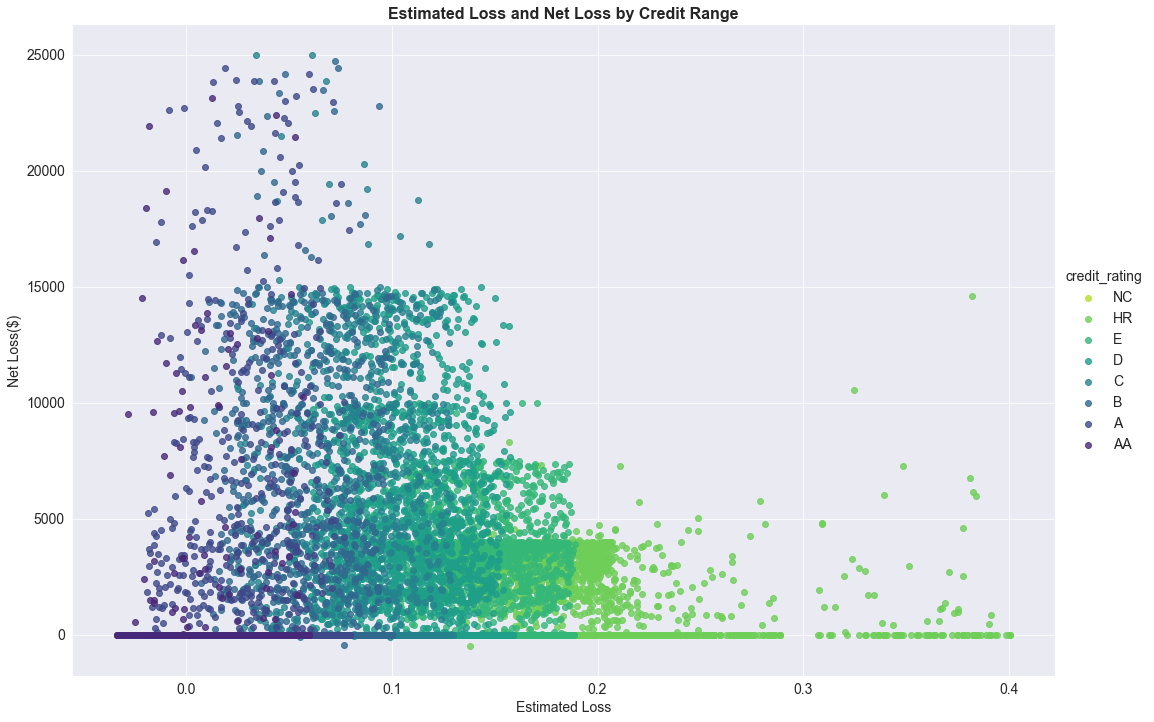

In [14]:
# plotting scatterplot for estimated loss and lp-netprincipalloss features
g = sb.FacetGrid(data = loan, hue = 'credit_rating', size = 10,  aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'estimatedloss', 'lp_netprincipalloss', fit_reg = False, x_jitter = 0.04)

# title and labels
g.add_legend()
plt.title('Estimated Loss and Net Loss by Credit Range', fontweight = 'bold', fontsize = 16)
plt.xlabel('Estimated Loss', fontsize = 14)
plt.ylabel('Net Loss($)', fontsize = 14);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt